<a href="https://colab.research.google.com/github/pyrds/FranklinU/blob/main/DATA611FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Dependencies
import pandas as pd
import numpy as np 

# data visualization
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

# Algorithms
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,StratifiedKFold
from sklearn.feature_selection import SelectFromModel,RFECV
from sklearn import linear_model, tree
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier,LassoCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


data = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/credit_default.csv')

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Pre-processing & Exploration
### This section just checks for Nans, Renames columns and understand relationships across variables

In [2]:
# Add columns headers to keep track a little
data['Amount Given'] = data.X1
data['Gender'] = data.X2
data['Education'] = data.X3
data['Marital Status'] = data.X4
data['Age'] = data.X5
data['September Repayment Status 2005'] = data.X6
data['August Repayment Status 2005'] = data.X7
data['July Repayment Status 2005'] = data.X8
data['June Repayment Status 2005'] = data.X9
data['May Repayment Status 2005'] = data.X10
data['April Repayment Status 2005'] = data.X11
data['September Bill Statement 2005'] = data.X12
data['August Bill Statement 2005'] = data.X13
data['July Bill Statement 2005'] = data.X14
data['June Bill Statement 2005'] = data.X15
data['May Bill Statement 2005'] = data.X16
data['April Bill Statement 2005'] = data.X17
data['September Amount Paid 2005'] = data.X18
data['August Amount Paid 2005'] = data.X19
data['July Amount Paid 2005'] = data.X20
data['June Amount Paid 2005'] = data.X21
data['May Amount Paid 2005'] = data.X22
data['April Amount Paid 2005'] = data.X23
data['Default'] = data.Y

In [3]:
## set new column names for easier understanding
data=data.drop(columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','Y'])

In [ ]:
## Count of NAN values in the columns. Looks like nothing to worry about here
NAN_Count = data.isna().sum()
NAN_Count

ID                                 0
Amount Given                       0
Gender                             0
Education                          0
Marital Status                     0
Age                                0
September Repayment Status 2005    0
August Repayment Status 2005       0
July Repayment Status 2005         0
June Repayment Status 2005         0
May Repayment Status 2005          0
April Repayment Status 2005        0
September Bill Statement 2005      0
August Bill Statement 2005         0
July Bill Statement 2005           0
June Bill Statement 2005           0
May Bill Statement 2005            0
April Bill Statement 2005          0
September Amount Paid 2005         0
August Amount Paid 2005            0
July Amount Paid 2005              0
June Amount Paid 2005              0
May Amount Paid 2005               0
April Amount Paid 2005             0
Default                            0
dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

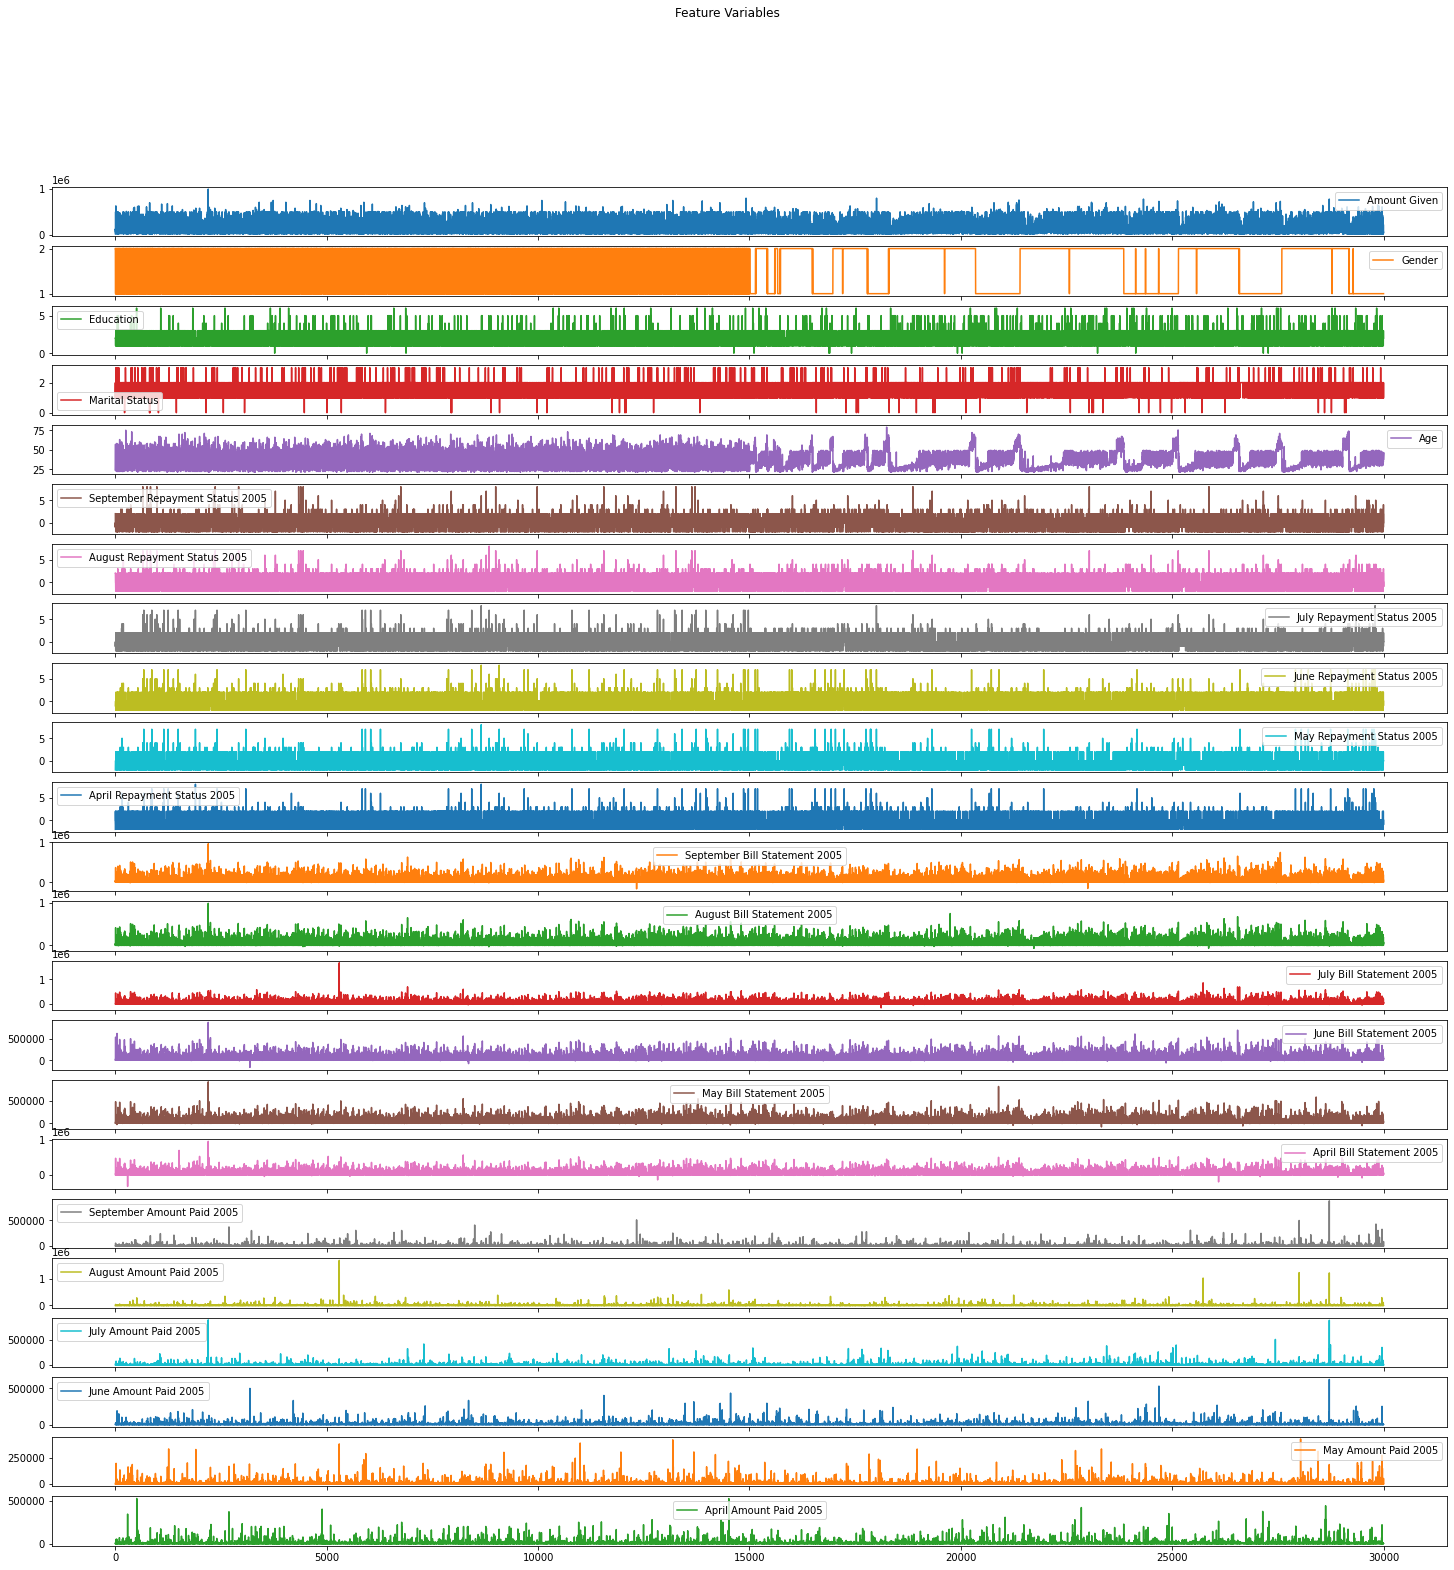

In [16]:
# Visualize all feature variables. We can see that there is some variability across all the features which confirms we need to normalize. 
# Additionally we would probably benefit from averaging the monthly features together. 
data[['Amount Given', 'Gender', 'Education', 'Marital Status', 'Age',
        'September Repayment Status 2005', 'August Repayment Status 2005', 'July Repayment Status 2005', 'June Repayment Status 2005', 'May Repayment Status 2005', 'April Repayment Status 2005',
        'September Bill Statement 2005', 'August Bill Statement 2005', 'July Bill Statement 2005', 'June Bill Statement 2005', 'May Bill Statement 2005', 'April Bill Statement 2005',
        'September Amount Paid 2005', 'August Amount Paid 2005', 'July Amount Paid 2005', 'June Amount Paid 2005', 'May Amount Paid 2005', 'April Amount Paid 2005']].plot(subplots = True, figsize = (25,25), title = 'Feature Variables')

In [13]:
# Lets average all the monthly columns 
data['Average Repayment Status'] = (data['September Repayment Status 2005']+data['August Repayment Status 2005']+data['July Repayment Status 2005']+data['June Repayment Status 2005']+data['May Repayment Status 2005']+data['April Repayment Status 2005'])/6
data['Average Bill Statement']   = (data['September Bill Statement 2005']+data['August Bill Statement 2005']+data['July Bill Statement 2005']+data['June Bill Statement 2005']+data['May Bill Statement 2005']+data['April Bill Statement 2005'])/6
data['Average Amount Paid'] = (data['September Amount Paid 2005']+data['August Amount Paid 2005']+data['July Amount Paid 2005']+data['June Amount Paid 2005']+data['May Amount Paid 2005']+data['April Amount Paid 2005'])/6


In [25]:
# Normalize and rescale all the feature variables
scaler = preprocessing.StandardScaler()
normalvar = scaler.fit_transform(data[['Amount Given', 'Gender', 'Education', 'Marital Status', 'Age',
       'September Repayment Status 2005', 'August Repayment Status 2005', 'July Repayment Status 2005', 'June Repayment Status 2005','May Repayment Status 2005', 'April Repayment Status 2005',
       'September Bill Statement 2005', 'August Bill Statement 2005', 'July Bill Statement 2005', 'June Bill Statement 2005', 'May Bill Statement 2005', 'April Bill Statement 2005',
       'September Amount Paid 2005', 'August Amount Paid 2005', 'July Amount Paid 2005', 'June Amount Paid 2005', 'May Amount Paid 2005', 'April Amount Paid 2005', 
       'Average Repayment Status','Average Bill Statement','Average Amount Paid']])

scaled_features_df = pd.DataFrame(normalvar, index=data.index)

In [18]:
##set up features and Target
Features_Data = data[['Amount Given', 'Gender', 'Education', 'Marital Status', 'Age',
       'September Repayment Status 2005', 'August Repayment Status 2005', 'July Repayment Status 2005', 'June Repayment Status 2005','May Repayment Status 2005', 'April Repayment Status 2005',
       'September Bill Statement 2005', 'August Bill Statement 2005', 'July Bill Statement 2005', 'June Bill Statement 2005', 'May Bill Statement 2005', 'April Bill Statement 2005',
       'September Amount Paid 2005', 'August Amount Paid 2005', 'July Amount Paid 2005', 'June Amount Paid 2005', 'May Amount Paid 2005', 'April Amount Paid 2005', 
       'Average Repayment Status','Average Bill Statement','Average Amount Paid']]
Target_Data = data[['Default']]

In [ ]:
Features_Data.shape

(30000, 24)

In [ ]:
Target_Data.shape

(30000, 1)

In [ ]:
##convert to matrix to be used for ML model
data_features = Features_Data.values
data_features
data_target=Target_Data.values

In [ ]:
data_features.shape

(30000, 24)

In [ ]:
data_target.shape

(30000, 1)

In [ ]:
##count of individuals who defaulted
Default_count = data.Default.value_counts()
Default_count

0    23364
1     6636
Name: Default, dtype: int64

<AxesSubplot:xlabel='Default', ylabel='Count'>

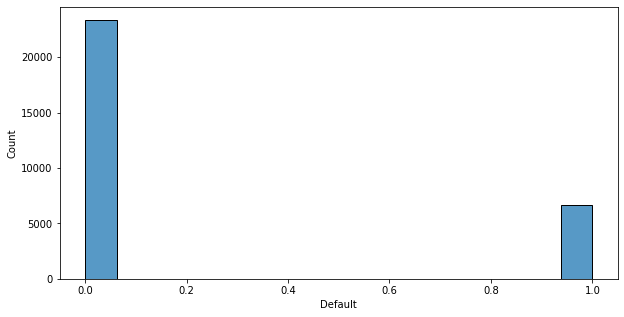

In [5]:
# Visual of imbalanced target variable. 
plt.figure(figsize=(10,5))
sns.histplot(data['Default'])

1. **Problem Description **<br>

  The problem is given a labeled dataset of past default credit loans, we must predict a loan defaulting with the features provided. This is a supervised machine learning model since this is labeled with a default loan of default (1 or 0). <br>

The feature variables provided are: <br>
- Amount Given
- Gender
- Education
- Marital Status
- Age
- September Repayment Status 2005
- August Repayment Status 2005
- July Repayment Status 2005
- June Repayment Status 2005
- May Repayment Status 2005
- April Repayment Status 2005
- September Bill Statement 2005
- August Bill Statement 2005
- July Bill Statement 2005
- June Bill Statement 2005
- May Bill Statement 2005
- April Bill Statement 2005
- September Amount Paid 2005
- August Amount Paid 2005
- July Amount Paid 2005
- June Amount Paid 2005
- May Amount Paid 2005
- April Amount Paid 2005 
- Average repayment status

The target variable is: <br>
- Default (Yes = 1, No = 0)